# PHASE 3 PROJECT

This project will focus on building a machine learning model to predict customer churn(This is the rate at which customers stop doing business with an entity) within SyriaTel, a telecommunications company. 

It encompasses key phases mainly;

1.Business Understanding

2.Data Understanding and Preparation

3.Performing Exploratory Data Analysis

4.Modelling 

5.Evaluating the model's Effectiveness

6.Recommendations and Conclutions.

The ultimate goal is to identify patterns in customer behavior that can inform effective customer retention strategies.

# 1. Business Undestanding

This project aims to predict customer churn at Syriatel Mobile Telecom using machine learning techniques.
By analyzing customer behavior and identifying patterns that indicate potential churn, the company can take proactive measures to improve customer retention. 
This approach is essential for maintaining their existing customer base and ensuring long-term profitability amidst increasing competition in the telecommunications sector.
The project aims to reduce customer churn rates for SyriaTel by identifying predictable patterns related to customer behavior. 
This proactive approach can help retain customers, thereby increasing revenues and profits, which benefits various stakeholders, including shareholders and employees. 
Improved customer service and telecommunications services will enhance customer satisfaction, contributing to the company's growth and market position.

Research Objectives:

1.To identify the primary factors contributing to customer churn.

2.To evaluate and determine the most effective predictive model for Customer Churn.

3.To develop strategies aimed at improving customer retention and decreasing churn rates.

# 2. Data Understanding and Preparation

This is where we shall have a structured approach to preparing your data for exploratory data analysis (EDA) and modeling. This process includes importing libraries, loading the dataset, previewing the data, and conducting data preprocessing.

In [74]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

In [75]:
#Load the dataset
df = pd.read_csv(r"C:\Users\kokum\OneDrive\Desktop\phase 3 project\bigml_59c28831336c6604c800002a.csv")
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


The dataset consists of 3,333 entries and 21 columns. It includes various details such as the state, account length, area code, phone number, international plan, voicemail plan, the number of voicemail messages, and several metrics related to call usage, including:

Total day minutes, calls, and charges

Total evening minutes, calls, and charges

Total night minutes, calls, and charges

Total international minutes, calls, and charges

Additionally, it contains information about customer service calls and a column with a label indicating whether the customer has churned.

In [76]:
# Removing whitespaces in the column name and replacing with '_'
df.columns = df.columns.str.replace(' ', '_')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   phone_number            3333 non-null   object 
 4   international_plan      3333 non-null   object 
 5   voice_mail_plan         3333 non-null   object 
 6   number_vmail_messages   3333 non-null   int64  
 7   total_day_minutes       3333 non-null   float64
 8   total_day_calls         3333 non-null   int64  
 9   total_day_charge        3333 non-null   float64
 10  total_eve_minutes       3333 non-null   float64
 11  total_eve_calls         3333 non-null   int64  
 12  total_eve_charge        3333 non-null   float64
 13  total_night_minutes     3333 non-null   float64
 14  total_night_calls       3333 non-null   

The dataset is made up of 4 columns that are of the object type, 8 are of integer type, 8 are floats and 1 column as bolean. 

Our target variable column is churn which is a boolen. 

In [78]:
#Taking a look at the statistical details such as std, percentile, count, and the mean
df.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [79]:
# checking for missing values in the dataframe
df_null = df.isna().sum()
df_null

state                     0
account_length            0
area_code                 0
phone_number              0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

The data frame has no missing values


In [80]:
# Since the phone number column is taged as an object and yet it is in numbers, we convert the column into an integer and replace the - with a white space
df['phone_number'] = df['phone_number'].str.replace('-', '').astype(int)
df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,3824657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,3717191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,3581921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,3759999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,3306626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# 3. Performing Exploratory Data Analysis

In this section, we are going to carry out comprehensive data analysis. The objective of this data exploration is to identify potential correlations between features and examine the distribution of variables, which will be essential for feature engineering and modeling.



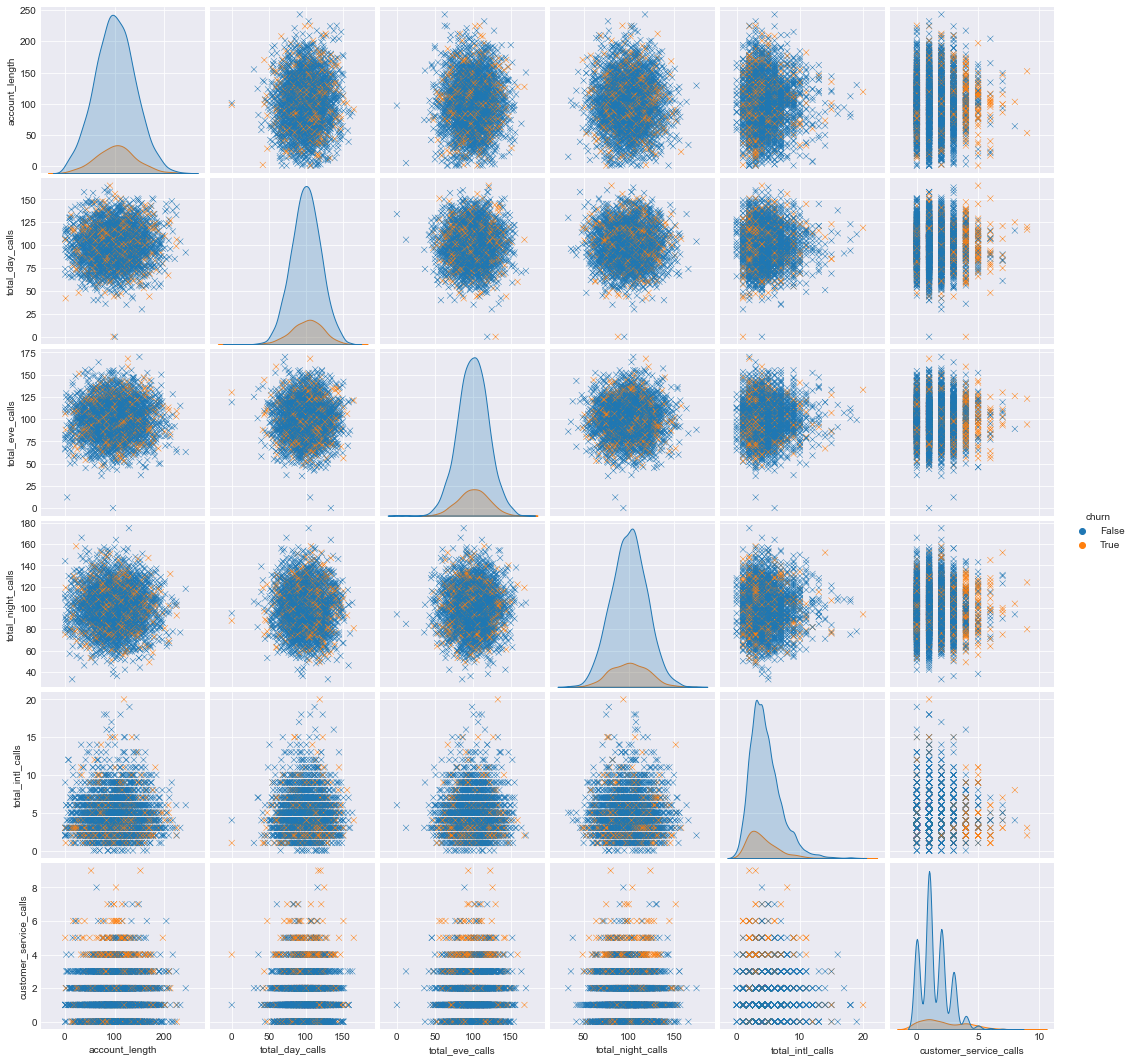

In [81]:
#plotting pairplots for numeric variables
data_temp = df[["account_length","total_day_calls","total_eve_calls","total_night_calls",
                "total_intl_calls","customer_service_calls","churn"]]
sns.pairplot(data_temp, hue="churn",height=2.5,markers='x', diag_kind="kde");
plt.show();

There is a strong relationship between customer service calls and true churn values. 

After 4 calls, customers are a lot more likely to discontinue their service.

Besides, most customer calls are are associated with disatisfaction with customer service. 

At this point more than 4 customer calls indicate that it takes long for their issues to be addressed, and thus a possibility of them leaving increases.

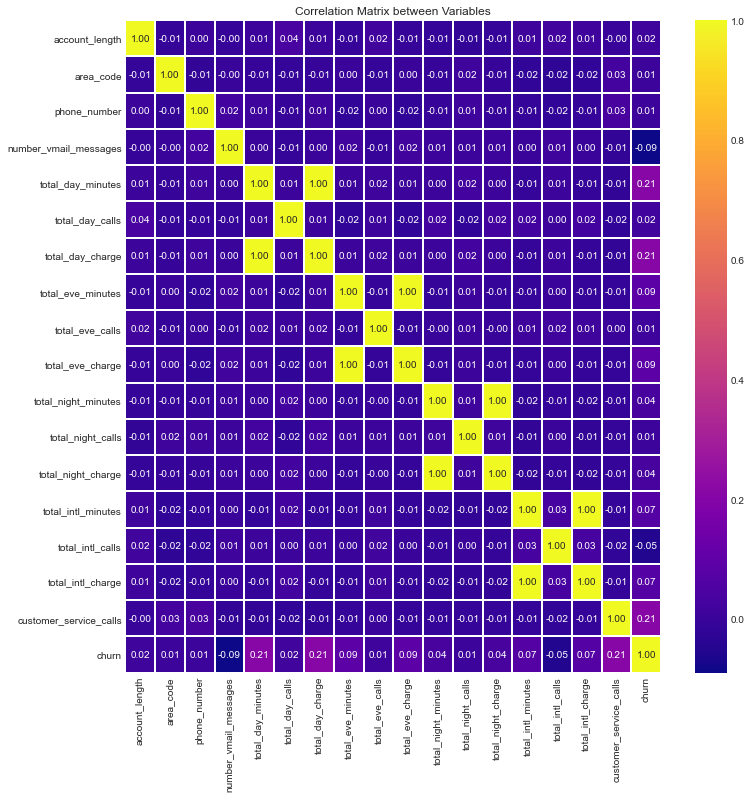

In [82]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Generate the correlation heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cmap='plasma', fmt=".2f", linewidths=1)
plt.title('Correlation Matrix between Variables')
plt.show();

The correlation matrix shows that total international charge and total international minutes ,total night minutes and total night charge, total evening minutes and total evening charge and total day minutes and total day charge have  perfect correlation which indicates multicollinearity. 

These features appears to be independent, which means we can only use one when creating the model.

Other features showing significant correlation to the target variable are total day minutes, total day charge, and customer service calls at 0.21.

# 4. Modelling

In [83]:

#convert churn values to integer 1s and 0s
df['churn'] = df['churn'].astype(int)

#convert area_code, international plan, and voice_mail_plan to integers 1s and 0s
df = pd.get_dummies(df, columns=['area_code', 'international_plan', 'voice_mail_plan'])


In [84]:
df = df.drop('state', axis=1)

In [85]:
df.head()

,account_length,phone_number,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,...,total_intl_charge,customer_service_calls,churn,area_code_408,area_code_415,area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,128,3824657,25,265.1,110,45.07,197.4,99,16.78,244.7,...,2.70,1,0,0,1,0,1,0,0,1
1,107,3717191,26,161.6,123,27.47,195.5,103,16.62,254.4,...,3.70,1,0,0,1,0,1,0,0,1
2,137,3581921,0,243.4,114,41.38,121.2,110,10.30,162.6,...,3.29,0,0,0,1,0,1,0,1,0
3,84,3759999,0,299.4,71,50.90,61.9,88,5.26,196.9,...,1.78,2,0,1,0,0,0,1,1,0
4,75,3306626,0,166.7,113,28.34,148.3,122,12.61,186.9,...,2.73,3,0,0,1,0,0,1,1,0


In [86]:
# Separating features from the target variable
y = df['churn']
X = df.drop('churn', axis=1)

In [87]:
#split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
# Fitting the model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

# 5.Model evaluation

## 5.1 Logistic regression


In the cell below, `0` means the prediction and the actual value matched, whereas `1` means the prediction and the actual value did not match.

In [89]:

y_hat_train = logreg.predict(X_train)

train_residuals = np.abs(y_train - y_hat_train)
print(pd.Series(train_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(train_residuals, name="Residuals (proportions)").value_counts(normalize=True))

0    2284
1     382
Name: Residuals (counts), dtype: int64

0    0.856714
1    0.143286
Name: Residuals (proportions), dtype: float64


The classifier was about 85% correct on the training data which is considered a fairly good performance.


In [90]:
y_hat_test = logreg.predict(X_test)

test_residuals = np.abs(y_test - y_hat_test)
print(pd.Series(test_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(test_residuals, name="Residuals (proportions)").value_counts(normalize=True))

0    566
1    101
Name: Residuals (counts), dtype: int64

0    0.848576
1    0.151424
Name: Residuals (proportions), dtype: float64


The classifier is performing at 84% on the test data

The model achieved an accuracy of 85% on the training data and 84% on the test data. This means that the model is performing relatively well on the unseen test data, which indicates that it is not overfitting.

In [ ]:
# Create a pipeline for preprocessing (only standardization, as there are no categorical columns)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.columns)  # Apply standardization to all numerical columns
    ]
)

# Initialize the logistic regression model with class_weight parameter
logistic_reg_model2 = LogisticRegression(class_weight='balanced')

# Create a pipeline that includes preprocessing and the logistic regression model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', logistic_reg_model2)
])

# Fit the model on the training data
model_pipeline.fit(X_train, y_train)

# Predict churn for the test data
y_pred = model_pipeline.predict(X_test)

# Calculate the accuracy of the model on train and test data
train_accuracy = model_pipeline.score(X_train, y_train)
test_accuracy = model_pipeline.score(X_test, y_test)

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Train Accuracy: 0.77
Test Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.78      0.86       566
           1       0.39      0.77      0.52       101

    accuracy                           0.78       667
   macro avg       0.67      0.78      0.69       667
weighted avg       0.87      0.78      0.81       667

Confusion Matrix:


## 5.2 Dession Tree 

In [91]:
# Initialize the Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)

# Train the classifier on the encoded training data
dtc.fit(X_train, y_train)

# Make predictions on the encoded testing data
y_pred = dtc.predict(X_test)

In [92]:
# Evaluate the model's performance
dtc_accuracy = accuracy_score(y_test, y_pred)
dtc_precision = precision_score(y_test, y_pred)
dtc_recall = recall_score(y_test, y_pred)
dtc_f1 = f1_score(y_test, y_pred)

print('Accuracy ', dtc_accuracy)
print('Precision ', dtc_precision)
print('Recall ', dtc_recall)
print('f1_Score ', dtc_f1)

#Calculate train and test scores
train_score = dtc.score(X_train, y_train)
test_score = dtc.score(X_test, y_test)

print('train score ', train_score)
print('test score ', test_score)

Accuracy  0.9190404797601199
Precision  0.7281553398058253
Recall  0.7425742574257426
f1_Score  0.7352941176470589
train score  1.0
test score  0.9190404797601199


In [93]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train a Decision Tree Classifier on the oversampled data
dt_smote = DecisionTreeClassifier(random_state=42)
dt_smote.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_smote = dt_smote.predict(X_test)

# Calculate the accuracy of the model
accuracy_smote = accuracy_score(y_test, y_pred_smote)
precision_smote = precision_score(y_test, y_pred_smote)
recall_smote = recall_score(y_test, y_pred_smote)
f1_smote = f1_score(y_test, y_pred_smote)

# Generate a classification report
classification_rep_smote = classification_report(y_test, y_pred_smote)

print(classification_rep_smote)

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       566
           1       0.56      0.76      0.65       101

    accuracy                           0.87       667
   macro avg       0.76      0.83      0.79       667
weighted avg       0.90      0.87      0.88       667



In [94]:
# Print the evaluation metrics
print("Accuracy:", accuracy_smote)
print("Precision:", precision_smote)
print("Recall:", recall_smote)
print("F1-score:", f1_smote)

#Calculate train and test scores
train_score = dt_smote.score(X_train_smote, y_train_smote)
test_score = dt_smote.score(X_test, y_test)

print('train score', train_score)
print('test score', test_score)

Accuracy: 0.8740629685157422
Precision: 0.5620437956204379
Recall: 0.7623762376237624
F1-score: 0.6470588235294118
train score 1.0
test score 0.8740629685157422


Test Accuracy: The model correctly predicted the outcome for about 87.4% of instances in the test set.

Precision: When the model predicts an instance to be positive, it is correct about 56.2% of the time.

Recall: The model is able to correctly identify about 76.2% of all actual positive instances.

F1 Score: The F1 score is approximately  64.7%, suggesting that the balance between precision and recall isn't that good, although there might be room for improvement, especially in terms of precision.

A train score of 1 means that the model has learned the patterns and relationships within the training data with an accuracy of approximately 100%.

A test score of 87.4% indicates that the model is performing fairly well on unseen data. It achieves an accuracy of approximately 87.4% on the test dataset, which suggests that the model is generalizing well and is not overfitting to the training data.

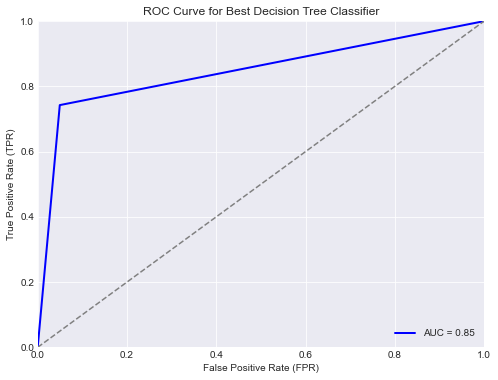

In [95]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get probability estimates for class 1 (positive class)
y_prob = dtc.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and threshold
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the area under the ROC curve (AUC)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Best Decision Tree Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

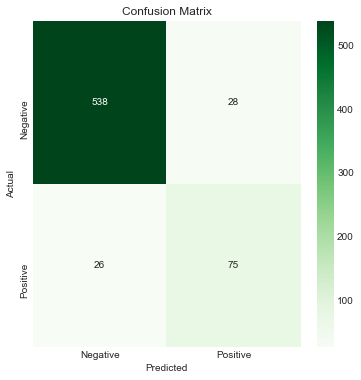

In [96]:
# creating the confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming predictions are the predictions from your classifier
predictions = dtc.predict(X_test)
conf_matrix = confusion_matrix(y_test, predictions)

# Defining the labels for the matrix
labels = ['Negative', 'Positive']

# Creating a color map for the matrix
cmap = 'Greens'

# Plotting the confusion matrix with colors
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=cmap, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

total_day_charge: 0.14138167743871188
total_day_minutes: 0.12905641835609935
customer_service_calls: 0.10735217382249851
total_intl_minutes: 0.09437803516103681
total_eve_charge: 0.08945261830948083
international_plan_no: 0.06968494336484612
total_intl_calls: 0.06362868051363126
total_eve_minutes: 0.05419265717868398
voice_mail_plan_no: 0.04117183611716329
total_night_minutes: 0.03330064502265897
total_eve_calls: 0.025381454352008833
total_day_calls: 0.02392400027528589
total_night_charge: 0.02314582832913778
account_length: 0.02239710366023396
phone_number: 0.016637015352339298
number_vmail_messages: 0.013551569580328939
international_plan_yes: 0.012488545059364009
area_code_510: 0.011252476588389515
total_night_calls: 0.01029802898944285
area_code_408: 0.007766391438430479
churn: 0.005703841581011237
area_code_415: 0.0036667553020786523
total_intl_charge: 0.00018730420713743238


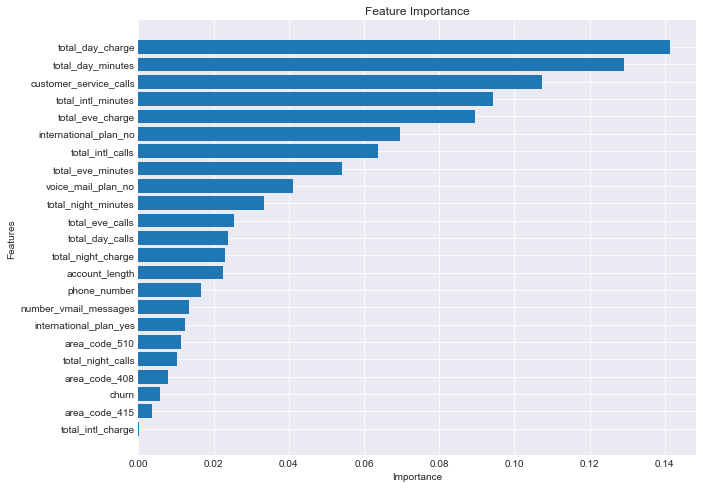

In [97]:
# Get the feature importances from the model
importances = dtc.feature_importances_

# Create a dictionary to store the feature importances
feature_importance_dict = {}

# Iterate over the column names and corresponding importances
for feature_name, importance in zip(df.columns, importances):
    feature_importance_dict[feature_name] = importance

# Sort the feature importances in descending order
sorted_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the sorted feature importances
for feature_name, importance in sorted_importances:
    print(f"{feature_name}: {importance}")

# Extract the feature names and importances from the sorted list
feature_names = [feature[0] for feature in sorted_importances]
importances = [feature[1] for feature in sorted_importances]

# Reverse the lists to flip the order
feature_names = feature_names[::-1]
importances = importances[::-1]

# Plot the feature importances as a bar graph
plt.figure(figsize=(10, 8))
plt.barh(range(len(importances)), importances, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

Total_day_charge = 0.14138167743871188: Customers with higher daytime charges are more likely to churn.

Total_day_minutes  = 0.12905641835609935: The total duration of daytime calls have the second-highest importance. Customers with longer daytime call durations may have higher engagement or usage, which can influence churn.

Customer_service_calls: 0.10735217382249851: The total duration of customer service calls is the third most important feature. Customers with longer customer sercice call durations may have issues with the service provided or longertime taken to solve their problems, which can influence churn.

Total_intl_minutes: 0.09437803516103681: The total international minutes on international calls made featured as the fourth most important feature. 

## 5.3 Random Forest

In [98]:
# Instantiate the standard scaler
scaler = StandardScaler()

# Fit and transform the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rfc.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = rfc.predict(X_test_scaled)

# Evaluate the model's performance
accuracy_rfc = accuracy_score(y_test, y_pred)
precision_rfc = precision_score(y_test, y_pred)
recall_rfc = recall_score(y_test, y_pred)
f1_rfc = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy_rfc)
print("Precision:", precision_rfc)
print("Recall:", recall_rfc)
print("F1-score:", f1_rfc)

# Calculate train and test scores
train_score = rfc.score(X_train_scaled, y_train)
test_score = rfc.score(X_test_scaled, y_test)

print('train score', train_score)
print('test score', test_score)


Accuracy: 0.9445277361319341
Precision: 0.9210526315789473
Recall: 0.693069306930693
F1-score: 0.7909604519774012
train score 1.0
test score 0.9445277361319341


Test Accuracy: The model correctly predicted the outcome for about 94.4% of instances in the test set.

Precision: When the model predicts an instance to be positive, it is correct about 92.1% of the time.

Recall: The model is able to correctly identify about 69.3% of all actual positive instances.

F1 Score: The F1 score is approximately  79.1%, suggesting that the balance between precision and recall isn't that good, although there might be room for improvement, especially in terms of recall.

Train score: 1.0 The train score of 1.0 indicates that the model achieved perfect accuracy on the training data. This could be an indication of potential overfitting, meaning the model may have memorized the training data and might not generalize well to new, unseen data.

A test score of 94.4% indicates that the model is performing well on unseen data. It achieves an accuracy of approximately 94.4% on the test dataset, which suggests that the model is generalizing well and is not overfitting to the training data.However, since the test score is slightly lower than the training score, there might be some slight overfitting.

In [99]:
#Using K-fold cross validation to eliminate overfitting

from sklearn.model_selection import cross_val_score 

# Instantiate the Random Forest classifier with desired parameters
rf = RandomForestClassifier(n_estimators=50, random_state=42)

# Fit and transform the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Address overfitting by using k-fold cross-validation
k = 5  # Number of folds for cross-validation
cv_scores = cross_val_score(rf, X_train_scaled, y_train, cv=k, scoring='accuracy')

# Train the classifier on the entire training data
rf.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test_scaled)

# Evaluate the model's performance
accuracy_rf = np.mean(cv_scores)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Cross-Validation Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)

# Calculate train and test scores
train_score = rf.score(X_train_scaled, y_train)
test_score = rf.score(X_test_scaled, y_test)

# Print the train and test scores
print("Train score:", train_score)
print("Test score:", test_score)

Cross-Validation Accuracy: 0.9478613740329278
Precision: 0.9102564102564102
Recall: 0.7029702970297029
F1-score: 0.7932960893854748
Train score: 0.9996249062265566
Test score: 0.9445277361319341


Cross-Validation Accuracy: 0.9478613740329278 The cross-validation accuracy is approximately 94.79%. This means that, on average, the Random Forest model achieved about 94.79% accuracy when trained and evaluated using k-fold cross-validation. It indicates that the model is performing well and generalizing reasonably well to new, unseen data.

Precision: 0.9102564102564102, The precision score is approximately 91.02%. This means that out of all the samples the model predicted as churned, around 91.02% of them were actually churned. A high precision score indicates that the model makes a few false positive predictions, which is essential in applications where false positives are costly.

Recall: 0.7029702970297029, The recall score is approximately 70.3%. This means that the model captured around 70.5x3% of the actual churned samples. A higher recall would be desirable as it indicates better sensitivity in detecting churned customers.

F1-score: 0.7932960893854748, The F1-score is approximately 79.33%. It is the harmonic mean of precision and recall and provides a balanced measure considering both false positives and false negatives. A higher F1-score (closer to 1) indicates a better balance between precision and recall.

Train score: 0.9996249062265566, The train score is approximately 99.9%. It indicates that the model achieved high accuracy on the training data. This suggests that the model has learned the training data well, but it also raises a concern about potential overfitting.

Test score: 0.9445277361319341, The test score is approximately 94.5%. It shows that the model achieved an accuracy of around 94.60% on the test data, which is slightly lower than the train score. This difference suggests some degree of overfitting, but it's not significant, considering the model's test performance is still high.

In summary, the Random Forest model seems to perform well overall in predicting customer churn based on the given dataset. It has high accuracy and precision, indicating it correctly classifies a significant portion of churned and not churned customers. However, the recall could be improved to better capture churned customers.

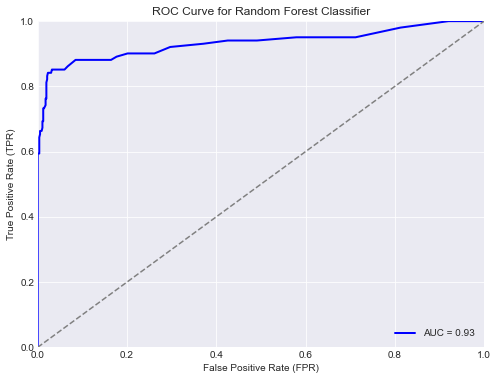

In [100]:
# Get probability estimates for class 1 (positive class)
y_prob = rfc.predict_proba(X_test_scaled)[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and threshold
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the area under the ROC curve (AUC)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

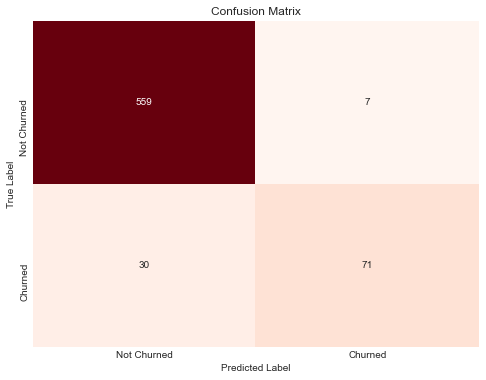

In [101]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

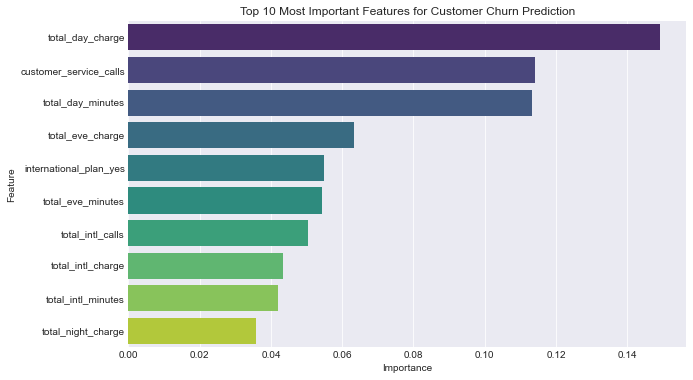

In [102]:
# Instantiate the Random Forest classifier with desired parameters
rfc = RandomForestClassifier(n_estimators=50, random_state=42)

# Train the classifier on the training data (using scaled features)
rfc.fit(X_train_scaled, y_train)

# Get the feature importances from the trained model
feature_importances = rfc.feature_importances_

# Create a DataFrame to store feature importances and corresponding feature names
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance values in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N most important features
top_n = 10  # You can change this value to get more or fewer features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(top_n), palette='viridis')
plt.title(f'Top {top_n} Most Important Features for Customer Churn Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

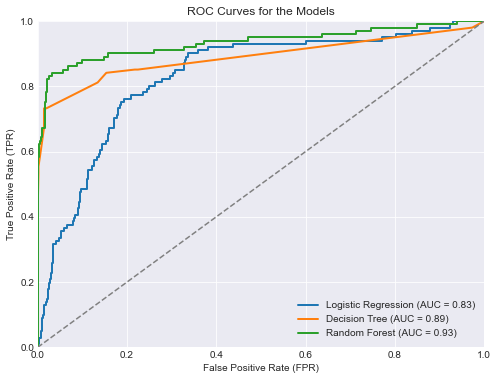

In [104]:
# Initialize the classifiers
lg = LogisticRegression(class_weight='balanced')
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
rf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)

classifiers = [lg, dt, rf]
names = ['Logistic Regression', 'Decision Tree', 'Random Forest']

# Fit and transform the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

plt.figure(figsize=(8, 6))

# Loop through each classifier and plot its ROC curve
for clf, name in zip(classifiers, names):
    clf.fit(X_train_scaled, y_train)
    y_prob = clf.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)

    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line representing a random classifier
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for the Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

The figure above show the ROC curves for Logistic Regression, Decision Tree, and Random Forest models. The Random Forest model outperformed the others, showing a higher Area Under the Curve (AUC) and better classification performance, making it the most effective model for the given task.

Based on the provided metrics, the Random Forest Classifier achieved the highest accuracy (94.78%) and F1-score (79.32%). The logistic regression had the highest recall (78.00%), while the Random Forest Classifier achieved the highest precision (91.00%). The Random Forest Classifier is the best performing model overall and so we selected it as our best model.

# 6.Recommendation and Conclusion
In conclusion, the analysis suggests that we can accurately predict customer churn using a machine learning model, with the Random Forest Classifier being our recommended model due to its strong overall performance. As this is the best performing model with an ROC curve that hugs the upper left corner of the graph, hence giving us the largest AUC (Area Under the curve).

I would recommend that Syriatel make use of the Random Forest Classifier as the primary model for predicting customer churn. This model has a higher ROC curve and strong overall performance in terms of accuracy, F1-score, recall, and precision on the test set, making it well-suited for accurately classifying customers as likely or unlikely to churn.

In terms of Business strategic recommendations for SyriaTel, I would recommend a Customer Retention strategy that addresses key features in relation to call minutes and charges. These efforts could include personalized offers or discounts on day charges. By implementing cost-effective strategies that address the key factors driving customer churn SyriaTel can retain customers and minimize revenue loss.

We would recommend, that Syriatel comes up with strategies to reduce on Customer Service calls, as this is among the top features that would likely lead to Customer Churn.
